# PyTroch: optim

지금까지는 Tensor를 직접 조작하여 model에 gradient를 직접 update 하였다. 

이것은 간단한 알고리즘에서는 크게 부담이 되지는 않지만, 좀 더 정교한 optimization을 위해서는 **AdaGrad, RMSProp, Adam** 등과 같은 좀 더 정교한 optimizer를 사용하는 것이 필요하다.

이 에제에서는 앞에서와 같이 nn 패키지를 사용하여 모델을 정의하고, optim 패키지가 제공하는 Adam 알고리즘을 이용하여 모델을 최적화한다.

In [0]:
import torch 
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [0]:
model = torch.nn.Sequential(torch.nn.Linear(D_in, H), 
                            torch.nn.ReLU(), 
                            torch.nn.Linear(H, D_out))

In [0]:
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
steps = []
loss_values = []

In [17]:
for t in range(500):
  
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  
  print(t, loss.item())
  
  steps.append(t)
  loss_values.append(loss.item())
  
  optimizer.zero_grad()
  
  loss.backward()
  
  optimizer.step()

0 683.4349975585938
1 665.83447265625
2 648.7086181640625
3 632.0774536132812
4 615.8775024414062
5 600.2352905273438
6 585.0313720703125
7 570.2551879882812
8 555.9690551757812
9 542.1260986328125
10 528.6307983398438
11 515.53759765625
12 502.7989501953125
13 490.4465026855469
14 478.4324951171875
15 466.74176025390625
16 455.38330078125
17 444.3535461425781
18 433.60723876953125
19 423.13665771484375
20 412.90496826171875
21 402.9500732421875
22 393.23095703125
23 383.76361083984375
24 374.5492858886719
25 365.5743103027344
26 356.8096618652344
27 348.29449462890625
28 340.01495361328125
29 331.9524841308594
30 324.0509338378906
31 316.3312683105469
32 308.7799987792969
33 301.3780822753906
34 294.1624755859375
35 287.1087341308594
36 280.2073669433594
37 273.44415283203125
38 266.8194274902344
39 260.33489990234375
40 253.9796142578125
41 247.76162719726562
42 241.69464111328125
43 235.75717163085938
44 229.9318084716797
45 224.2389678955078
46 218.65599060058594
47 213.18406677246

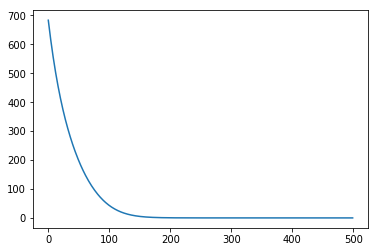

In [18]:
plt.plot(steps, loss_values)
plt.show()